## Introduction to the Data Set
*  Import pandas, matplotlib, and numpy into the environment. Import the classes you need from scikit-learn as well.
*  Read __AmesHousing.txt__ into a pandas data frame.
*  For the following functions, we recommend creating them in the first few cells in the notebook. This way, you can add cells to the end of the notebook to do experiments and update the functions in these cells.
  *  Create a function named __transform_features()__ that, for now, just returns the __train__ data frame.
  *  Create a function named __select_features()__ that, for now, just returns the __Gr Liv Area__ and __SalePrice__ columns from the __train__ data frame.
  *  Create a function named __train_and_test()__ that, for now:
    *  Selects the first __1460__ rows from from __data__ and assign to __train__.
    *  Selects the remaining rows from __data__ and assign to __test__.
    *  Trains a model using all numerical columns except the __SalePrice__ column (the target column) from the data frame returned from __select_features()__
    *  Tests the model on the test set using and returns the RMSE value.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
data = pd.read_csv('AmesHousing.txt', delimiter='\t')

In [3]:
def transform_features(df):
    return df

def select_features():
    return ['Gr Liv Area'], 'SalePrice'

def train_and_test(df, train_features, target):
    train = df.iloc[:1460].copy()
    test = df.iloc[1460:].copy()
    lr = LinearRegression()
    lr.fit(train[train_features],train[target])
    predict = lr.predict(test[train_features])
    mse = mean_squared_error(test[target],predict)
    RMSE = np.sqrt(mse)
    
    return RMSE

In [4]:
df_Initial = transform_features(data)
train_features_Initial, target_Initial = select_features()
RMSE_Initial = train_and_test(df_Initial, train_features_Initial, target_Initial)
RMSE_Initial

57088.251612639091

## Feature Engineering
1. For all columns, drop any with 5% or more missing.  This will be revisited later.
1. For the text columns, drop any with 1 or more missing values, again this will be revisited later.
1. For the numerical columns, fill NaN with the following:
  *  If the column contains continuous data fill with the mean for that column.
  *  If the column contains nominal/categorical data then fill with the mode for that column.
1. What new features be created, that better capture the information in some of the features?
1. Drop columns that aren't useful for ML
1. Drop columns that leak info about the final sale.

In [5]:
# Create a copy of the Data DataFrame
df = transform_features(data)

In [6]:
# Convert Ordinal text values to integers
replace_ordinal_text_vals = {'Lot Shape': {'Reg':4,'IR1':3,'IR2':2,'IR3':1},
               'Utilities': {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1},
               'Land Slope': {'Gtl':3,'Mod':2,'Sev':1},
               'Exter Qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
               'Exter Cond': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
               'Bsmt Qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
               'Bsmt Cond': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
               'Bsmt Exposure': {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':np.nan},
               'BsmtFin Type 1': {'GLQ':6,'ALQ':5,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1,'NA':np.nan},
               'BsmtFin Type 2': {'GLQ':6,'ALQ':5,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1,'NA':np.nan},
               'Heating QC': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
               'Electrical': {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1},
               'Kitchen Qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
               'Functional': {'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1},
               'Fireplace Qu': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
               'Garage Finish': {'Fin':3,'RFn':2,'Unf':1,'NA':np.nan},
               'Garage Qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
               'Garage Cond': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
               'Paved Drive': {'Y':3,'P':2,'N':1},
               'Pool QC': {'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':np.nan},
               'Fence': {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':np.nan}}
df = df.replace(replace_ordinal_text_vals)
df[list(replace_ordinal_text_vals.keys())]

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,3,4,3,3,3,3.0,4.0,4.0,3.0,1.0,...,5.0,3,8,4.0,3.0,3.0,3.0,2,NaN,NaN
1,4,4,3,3,3,3.0,3.0,1.0,4.0,2.0,...,5.0,3,8,NaN,1.0,3.0,3.0,3,NaN,3.0
2,3,4,3,3,3,3.0,3.0,1.0,5.0,1.0,...,5.0,4,8,NaN,1.0,3.0,3.0,3,NaN,NaN
3,4,4,3,4,3,3.0,3.0,1.0,5.0,1.0,...,5.0,5,8,3.0,3.0,3.0,3.0,3,NaN,NaN
4,3,4,3,3,3,4.0,3.0,1.0,6.0,1.0,...,5.0,3,8,3.0,3.0,3.0,3.0,3,NaN,3.0
5,3,4,3,3,3,3.0,3.0,1.0,6.0,1.0,...,5.0,4,8,4.0,3.0,3.0,3.0,3,NaN,NaN
6,4,4,3,4,3,4.0,3.0,2.0,6.0,1.0,...,5.0,4,8,NaN,3.0,3.0,3.0,3,NaN,NaN
7,3,4,3,4,3,4.0,3.0,1.0,5.0,1.0,...,5.0,4,8,NaN,2.0,3.0,3.0,3,NaN,NaN
8,3,4,3,4,3,4.0,3.0,1.0,6.0,1.0,...,5.0,4,8,3.0,2.0,3.0,3.0,3,NaN,NaN
9,4,4,3,3,3,3.0,3.0,1.0,1.0,1.0,...,5.0,4,8,3.0,3.0,3.0,3.0,3,NaN,NaN


In [7]:
# Show all columns that have missing values and the quantity
missing = df.isnull().sum()
print(missing[missing>0])

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [8]:
# Make a copy of the data DF and drop all columns that have %5 or more missing values.
percent_missing = df.isnull().sum()/len(df)
drop_missing_cols = percent_missing[percent_missing > 0.05].sort_values()
df = df.drop(drop_missing_cols.index, axis=1)
print('Dropped Columns Due to > 5.0% missing values')
drop_missing_cols

Dropped Columns Due to > 5.0% missing values


Garage Type      0.053584
Garage Yr Blt    0.054266
Garage Finish    0.054266
Garage Qual      0.054266
Garage Cond      0.054266
Lot Frontage     0.167235
Fireplace Qu     0.485324
Fence            0.804778
Alley            0.932423
Misc Feature     0.963823
Pool QC          0.995563
dtype: float64

In [9]:
# Drop all text columns that have any missing values
text_cols = df.select_dtypes(include=['object'])
missing_values = text_cols.isnull().sum()
drop_missing_cols = missing_values[missing_values > 0]
df = df.drop(drop_missing_cols.index, axis=1)
print('Dropped Text Columns Due to > 1 missing value')
drop_missing_cols

Dropped Text Columns Due to > 1 missing value


Mas Vnr Type    23
dtype: int64

In [10]:
# Determine the number of unique values & missing values for each numerical column
num_cols = df.select_dtypes(include=['int64','float64'])

uniq_values = [len(num_cols[col].unique()) for col in num_cols.columns]
uniq_num_series = pd.Series(data=uniq_values, index=num_cols.columns).sort_values(ascending=False)

missing_values = num_cols.isnull().sum()
uniq_num_df = pd.DataFrame()

uniq_num_df['Unique'] = uniq_num_series
uniq_num_df['Missing'] = missing_values

uniq_num_df

,Unique,Missing
Order,2930,0
PID,2930,0
Lot Area,1960,0
Gr Liv Area,1292,0
Bsmt Unf SF,1138,1
1st Flr SF,1083,0
Total Bsmt SF,1059,1
SalePrice,1032,0
BsmtFin SF 1,996,1
2nd Flr SF,635,0


In [11]:
# Fill the numerical with the mode
num_cols = df.select_dtypes(include=['int64','float64'])
df[num_cols.columns] = df[num_cols.columns].fillna(df[num_cols.columns].mode().iloc[0])

In [12]:
# Verify that the resulting DataFrame has no missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [13]:
# Create new features, that better captures the information.

# The 'Year Remod/Add' & 'Year Built' columns to calculate the years after the house
# was built until it was remodeled
years_until_remod = df['Year Remod/Add'] - df['Year Built']


# Similar to the above transformation... Yr Sold would provide better information if we altered it
# to the age of the house when sold.
age_when_sold = df['Yr Sold'] - df['Year Built']

# Check for negative values
print(years_until_remod[years_until_remod<0])
print(age_when_sold[age_when_sold<0])

850   -1
dtype: int64
2180   -1
dtype: int64


In [14]:
# Add newly created features and remove rows with negative values
df['years_until_remod'] = years_until_remod
df['age_when_sold'] = age_when_sold
df = df.drop([850,2180], axis=0)

## No longer need original year columns
df = df.drop(['Yr Sold', 'Year Built'], axis=1)

In [15]:
# Drop columns that aren't useful for ML
df = df.drop(['Order', 'PID'], axis=1)

# These columns have information that cannot be known 
# prior to the sale, as such they leak data.
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type"], axis=1)

In [16]:
# Review data
print(df.isnull().sum())
df.info()

MS SubClass          0
MS Zoning            0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area         0
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         0
                    ..
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen Abv

In [17]:
# Overwrite transform_features() so that it preforms the above feature engineering steps

def transform_features(df, missing_values_percent_threshold=0.05):
    # Convert Ordinal text values to integers
    replace_ordinal_text_vals = {'Lot Shape': {'Reg':4,'IR1':3,'IR2':2,'IR3':1},
                   'Utilities': {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1},
                   'Land Slope': {'Gtl':3,'Mod':2,'Sev':1},
                   'Exter Qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                   'Exter Cond': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                   'Bsmt Qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
                   'Bsmt Cond': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
                   'Bsmt Exposure': {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':np.nan},
                   'BsmtFin Type 1': {'GLQ':6,'ALQ':5,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1,'NA':np.nan},
                   'BsmtFin Type 2': {'GLQ':6,'ALQ':5,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1,'NA':np.nan},
                   'Heating QC': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                   'Electrical': {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1},
                   'Kitchen Qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                   'Functional': {'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1},
                   'Fireplace Qu': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
                   'Garage Finish': {'Fin':3,'RFn':2,'Unf':1,'NA':np.nan},
                   'Garage Qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
                   'Garage Cond': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':np.nan},
                   'Paved Drive': {'Y':3,'P':2,'N':1},
                   'Pool QC': {'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':np.nan},
                   'Fence': {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':np.nan}}
    df = df.replace(replace_ordinal_text_vals)
    
    # Drop all columns that have missing values, then the threshold allows.
    percent_missing = df.isnull().sum()/len(df)
    drop_missing_cols = percent_missing[percent_missing > missing_values_percent_threshold].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    # Drop all text columns that have any missing values
    text_cols = df.select_dtypes(include=['object'])
    missing_values = text_cols.isnull().sum()
    drop_missing_cols = missing_values[missing_values > 0]
    df = df.drop(drop_missing_cols.index, axis=1)
    
    # Fill missing numerical data with mode
    num_cols = df.select_dtypes(include=['int64','float64'])
    df[num_cols.columns] = df[num_cols.columns].fillna(df[num_cols.columns].mode().iloc[0])
    
    # Create new features, that better captures the information.
    # The 'Year Remod/Add' & 'Year Built' columns to calculate the years after the house
    # was built until it was remodeled
    df['years_until_remod'] = df['Year Remod/Add'] - df['Year Built']
    # Similar to the above transformation... Yr Sold would provide better information if we altered it
    # to the age of the house when sold.
    df['age_when_sold'] = df['Yr Sold'] - df['Year Built']
    # Remove rows with negative values
    df = df.drop([850,2180], axis=0)
    # No longer need original year columns
    df = df.drop(['Yr Sold', 'Year Built'], axis=1)
    
    # Drop columns that aren't useful for ML
    df = df.drop(['Order', 'PID'], axis=1)

    # These columns have information that cannot be known 
    # prior to the sale, as such they leak data.
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type"], axis=1)
    
    # This column really should be text as it is listed as Nominal in the data description document
    df['MS SubClass'] = df['MS SubClass'].astype('object')
    
    return df

In [18]:
# Quick Check that we get the same results as above
df = transform_features(data, missing_values_percent_threshold=0.05)
print(df.isnull().sum())
df.info()

MS SubClass          0
MS Zoning            0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area         0
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         0
                    ..
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen Abv

## Feature Selection
*  Generate a correlation heatmap matrix of the numerical features in the training data set.
  *  Which features correlate strongly with our target column, __SalePrice__?
  *  Calculate the correlation coefficients for the columns that seem to correlate well with __SalePrice__. Because we have a pipeline in place, it's easy to try different features and see which features result in a better cross validation score.
*  Which columns in the data frame should be converted to the categorical data type? All of the columns marked as __nominal__ from the [documentation](DataDocumentation.txt) are candidates for being converted to categorical. Here are some other things you should think about:
  *  If a categorical column has hundreds of unique values (or categories), should you keep it? When you dummy code this column, hundreds of columns will need to be added back to the data frame.
  *  Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? This would be similar to a low variance numerical feature (no variability in the data for the model to capture).
*  Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
*  What are some ways we can explore which categorical columns "correlate" well with __SalePrice__?
  *  Read this post for some [potential strategies](https://machinelearningmastery.com/feature-selection-machine-learning-python/).
*  Update the logic for the __select_features()__ function. This function should take in the new, modified train and test data frames that were returned from __transform_features()__.

#### Dealing with the numerical columns 1st

In [19]:
# Determine the extent that each numerical training feature coorelates to the target (SalePrice).
corrmat = df.select_dtypes(include=['int64','float64']).corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values(ascending=False)
sorted_corrs

SalePrice            1.000000
Overall Qual         0.800279
Gr Liv Area          0.712893
Exter Qual           0.698883
Bsmt Qual            0.679726
Kitchen Qual         0.673466
Garage Cars          0.648071
Total Bsmt SF        0.641701
Garage Area          0.641184
1st Flr SF           0.632531
age_when_sold        0.559042
Full Bath            0.545641
Year Remod/Add       0.533076
Mas Vnr Area         0.505564
TotRms AbvGrd        0.497966
Fireplaces           0.475073
Heating QC           0.450356
BsmtFin SF 1         0.437732
Bsmt Exposure        0.400176
Wood Deck SF         0.327790
Open Porch SF        0.315141
Lot Shape            0.291420
Half Bath            0.285217
Paved Drive          0.275943
Bsmt Full Bath       0.275820
2nd Flr SF           0.269518
Lot Area             0.267122
BsmtFin Type 1       0.266487
years_until_remod    0.240133
Electrical           0.232594
Bsmt Unf SF          0.183447
Bsmt Cond            0.154896
Bedroom AbvGr        0.143939
Enclosed P

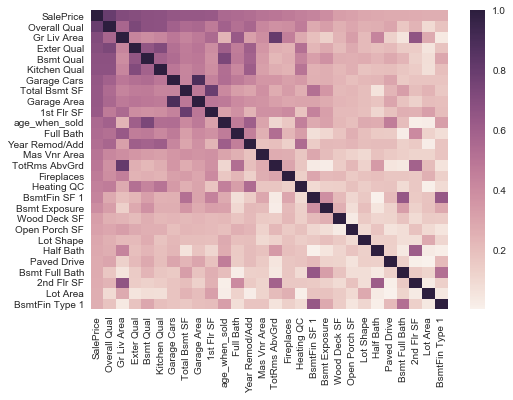

In [20]:
# Determine the extent of colinearity for each numerical training feature
# Limit the check to features with a correlation to the SalePrice >= 0.25
strong_corrs = sorted_corrs[sorted_corrs >= 0.25]
corrmat = df[strong_corrs.index].corr().abs()
fig = plt.subplots()
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
sns.heatmap(corrmat)

#### Features with relatively strong colinearity
1. 1st Flr SF (Continuous) & Total Basmt SF (Continuous)
1. Gr Liv Area (Continuous) & Full Bath (Discrete)
1. Gr Liv Area (Continuous) & Half Bath (Discrete)
1. Gr Liv Area (Continuous) & TotRms AbvGrd (Discrete)
1. Garage Area (Continuous) & Garage Cars (Discrete)
1. TotRms AbvGrd (Discrete) & Full Bath (Discrete)
1. Bsmt Full Bath (Discrete) & BsmtFin SF1 (Continuous)
1. Half Bath (Discrete) & TotRms AbvGrd (Continuous)
1. 2nd Flr SF (Continuous) & Half Bath (Discrete)
1. 2nd Flr SF (Continuous) & TotRms AbvGrd (Discrete)
1. Gr Liv Area (Continuous) & 2nd Flr SF (Continuous)

#### To determine which features will be kept and which features will be dropped, the following set of criteria will be applied:
* Features that more strongly correlate with the target (SalePrice)
* Continuous data features will be favored

In [21]:
colinearity_cols = ['2nd Flr SF', '1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'TotRms AbvGrd', 'Full Bath',
                    'Half Bath', 'Garage Area', 'Garage Cars', 'Bsmt Full Bath', 'BsmtFin SF 1']
sorted_corrs = corrmat['SalePrice'].abs()
sorted_corrs.loc[colinearity_cols].sort_values(ascending=False)

Gr Liv Area       0.712893
Garage Cars       0.648071
Total Bsmt SF     0.641701
Garage Area       0.641184
1st Flr SF        0.632531
Full Bath         0.545641
TotRms AbvGrd     0.497966
BsmtFin SF 1      0.437732
Half Bath         0.285217
Bsmt Full Bath    0.275820
2nd Flr SF        0.269518
Name: SalePrice, dtype: float64

#### Based upon the criteria listed above the following features will be kept or dropped.
* __Featues Kept__
  1. Total Bsmt SF
  1. Gr Liv Area
  1. Garage Area
  1. BsmtFin SF 1
* __Featues Dropped__
  1. 1st Flr SF
  1. TotRms AbvGrd
  1. Full Bath
  1. Half Bath
  1. Garage Cars
  1. Bsmt Full Bath
  1. 2nd Flr SF


In [22]:
# Drop the columns due to colinearity
dropped_colinearity = ['1st Flr SF', 'TotRms AbvGrd', 'Full Bath', 
                       'Half Bath', 'Garage Cars', 'Bsmt Full Bath', '2nd Flr SF']
df = df.drop(dropped_colinearity, axis=1)

In [23]:
# Display the variance for each numerical training feature
# Of the remaining features, a variance check will be done
# Those with low variance (<0.015) will be dropped

numerical = df.select_dtypes(include=['int64','float64'])

# Rescale the numerical columns
unit = (numerical - numerical.min()) / (numerical.max() - numerical.min())

# Verify rescaling worked
print('Max Values')
print(unit.max())
print('\nMin Values')
print(unit.min())

sorted_vars = unit.var().sort_values(ascending=False)
print('\n\nSorted Variance Values')
print(sorted_vars)

print('\nLow Variance Features')
sorted_vars[sorted_vars<0.0015]

Max Values
Lot Area             1.0
Lot Shape            1.0
Utilities            1.0
Land Slope           1.0
Overall Qual         1.0
Overall Cond         1.0
Year Remod/Add       1.0
Mas Vnr Area         1.0
Exter Qual           1.0
Exter Cond           1.0
Bsmt Qual            1.0
Bsmt Cond            1.0
Bsmt Exposure        1.0
BsmtFin Type 1       1.0
BsmtFin SF 1         1.0
BsmtFin Type 2       1.0
BsmtFin SF 2         1.0
Bsmt Unf SF          1.0
Total Bsmt SF        1.0
Heating QC           1.0
Electrical           1.0
Low Qual Fin SF      1.0
Gr Liv Area          1.0
Bsmt Half Bath       1.0
Bedroom AbvGr        1.0
Kitchen AbvGr        1.0
Kitchen Qual         1.0
Functional           1.0
Fireplaces           1.0
Garage Area          1.0
Paved Drive          1.0
Wood Deck SF         1.0
Open Porch SF        1.0
Enclosed Porch       1.0
3Ssn Porch           1.0
Screen Porch         1.0
Pool Area            1.0
Misc Val             1.0
SalePrice            1.0
years_until_re

Lot Area     0.001351
Misc Val     0.000927
Utilities    0.000512
dtype: float64

#### Handling the text columns

In [24]:
# Filter for text columns and determine the number of unique values
text_cols = df.select_dtypes(include=['object'])

uv = []
for col in text_cols.columns:
    uv.append(len(text_cols[col].unique()))
    
unique_vals = pd.Series(data=uv, index=text_cols.columns).sort_values(ascending=False)
unique_vals

Neighborhood    28
Exterior 2nd    17
MS SubClass     16
Exterior 1st    16
Condition 1      9
Roof Matl        8
House Style      8
Condition 2      8
MS Zoning        7
Foundation       6
Roof Style       6
Heating          6
Bldg Type        5
Lot Config       5
Land Contour     4
Street           2
Central Air      2
dtype: int64

In [25]:
# For each nominal value do the following:
    # categorize the type
    # create dummy columns
    # append to the training df
    # remove the original column
    
for col in text_cols.columns:
    col_dummies = pd.get_dummies(df[col])
    df = pd.concat([df, col_dummies], axis=1)
    df = df.drop([col], axis=1)

df.columns

Index([      'Lot Area',      'Lot Shape',      'Utilities',     'Land Slope',
         'Overall Qual',   'Overall Cond', 'Year Remod/Add',   'Mas Vnr Area',
           'Exter Qual',     'Exter Cond',
       ...
                'Stone',           'Wood',          'Floor',           'GasA',
                 'GasW',           'Grav',           'OthW',           'Wall',
                    'N',              'Y'],
      dtype='object', length=194)

In [26]:
# Overwrite transform_features() so that it preforms the above feature engineering steps
# parameterize the following thresholds: correlation, variance, & number of unique values

def select_features(df, min_correlation=0.25, min_variance=0.0015, max_unique_vals=10):
    # Save the target column in the event it is dropped
    target = 'SalePrice'
    target_col = df[target]
    
    # Drop the columns due to colinearity
    dropped_colinearity = ['1st Flr SF', 'TotRms AbvGrd', 'Full Bath', 
                       'Half Bath', 'Garage Cars', 'Bsmt Full Bath', '2nd Flr SF']
    # Verify that none of the colinear columns haven't already been removed from the df
    df_columns = df.columns.tolist()
    drop_cols = list(set(dropped_colinearity).intersection(df_columns))
    df = df.drop(drop_cols, axis=1)
    
    # Drop each column that fails the correlation threshold
    corrmat = df.select_dtypes(include=['int64','float64']).corr()
    corrs = corrmat[target].abs()
    weak_corrs = corrs[corrs < min_correlation]
    df = df.drop(weak_corrs.index, axis=1)
    
    # Drop each column that fails the variance threshold
    numerical = df.select_dtypes(include=['int64','float64'])
    rescaled = (numerical - numerical.min()) / (numerical.max() - numerical.min())
    var = rescaled.var()
    var_threshold = var[var < min_variance]
    df = df.drop(var_threshold.index, axis=1)
    
    # Drop each column that exceeds the unique_vals threshold
    # Otherwise categorize the type and generate dummy columns
    nominal_features = ["MS SubClass", "MS Zoning", "Street", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Foundation", "Heating", "Central Air"]
    for col in nominal_features:
        if len(df[col].unique()) < max_unique_vals:
            df[col] = df[col].astype('category')
            col_dummies = pd.get_dummies(df[col])
            df = pd.concat([df, col_dummies], axis=1)
    df = df.drop(nominal_features, axis=1)        

    # Ensure the target column (SalePrice) isn't amonge the training features
    features = df.columns.tolist()
    while target in features:
        features.remove(target)
        
    # Check if the target column was dropped, if true then put it back
    if not target in df.columns:
        df[target] = target_col
            
    return features, target, df

In [27]:
# Test select_features()
df = transform_features(data, missing_values_percent_threshold=0.05)
features, target, df = select_features(df, min_correlation=0.25, min_variance=0.0015, max_unique_vals=10)
for f in features:
    print(f)

Lot Shape
Overall Qual
Year Remod/Add
Mas Vnr Area
Exter Qual
Bsmt Qual
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
Total Bsmt SF
Heating QC
Gr Liv Area
Kitchen Qual
Fireplaces
Garage Area
Paved Drive
Wood Deck SF
Open Porch SF
age_when_sold
A (agr)
C (all)
FV
I (all)
RH
RL
RM
Grvl
Pave
Bnk
HLS
Low
Lvl
Corner
CulDSac
FR2
FR3
Inside
Artery
Feedr
Norm
PosA
PosN
RRAe
RRAn
RRNe
RRNn
Artery
Feedr
Norm
PosA
PosN
RRAe
RRAn
RRNn
1Fam
2fmCon
Duplex
Twnhs
TwnhsE
1.5Fin
1.5Unf
1Story
2.5Fin
2.5Unf
2Story
SFoyer
SLvl
Flat
Gable
Gambrel
Hip
Mansard
Shed
ClyTile
CompShg
Membran
Metal
Roll
Tar&Grv
WdShake
WdShngl
BrkTil
CBlock
PConc
Slab
Stone
Wood
Floor
GasA
GasW
Grav
OthW
Wall
N
Y


## 04 Train, Test, & Optimize the Hyper Parameters
*  The optional __k__ parameter should accept integer values, with a default value of __0__.
*  When __k__ equals __0__, perform holdout validation (what we already implemented):
  *  Select the first __1460__ rows and assign to __train__.
  *  Select the remaining rows and assign to __test__.
  *  Train on train and test on __test__.
  *  Compute the RMSE and return.
*  When __k__ equals __1__, perform simple cross validation:
  *  Shuffle the ordering of the rows in the data frame.
  *  Select the first __1460__ rows and assign to __fold_one__.
  *  Select the remaining rows and assign to __fold_two__.
  *  Train on __fold_one__ and test on __fold_two__.
  *  Train on __fold_two__ and test on __fold_one__.
  *  Compute the average RMSE and return.
*  When __k__ is greater than __0__, implement k-fold cross validation using __k__ folds:
  *  Perform k-fold cross validation using __k__ folds.
  *  Calculate the average RMSE value and return this value.

In [28]:
def plot_RMSE_h_para_optimization(h_parameters, rmse_dict, title=" ", legend_h_offset = 1.35, 
    legend_v_offset=1.09, x_axis_label='Hyper Paremeter', default_x_ticks=True):
    
    # Generates both a scatter plot and a line plot from the data provided.  The rmse values will
        # be placed on the y-axis
    # Returns a pd.DataFrame: 
        # index = data_label
        # col_1 = minimum RMSE
        # col_2 = Corresponding h_parameter value
    
    # Parameter descriptions
        # data_labels: A list of each of the item(s) that are being evaluated.  T
            # Each list item will be a label on the resulting plot
        # h_parameters: A list of each of the h_parameter values, this list will generate the x-axis values
        # rmse_dict: 
            # Keys = Each of the item(s) that are being evaluated.  The key will be a 
                # label for the corresponding data set on the resulting plot and 
                # will be shown on the legend.
            # Values = A list of each of the y-axis values for the key.  Note, it must
                # have the same number of items as the h_parameters list.
        # title: The string value that will be used as both plot titles
        # legend_h_offset: The horizontal offset value for the legend
        # legend_v_offset: The vertical offset value for the legend
        # x_axis_label: The string value that will be placed on the x-axis
        # default_x_ticks: If set to False the h_parameters will be used to set_xticks
        
    matplotlib.rc('legend', fontsize=16)
    fig = plt.figure(figsize=(12,20))
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)

    ax1.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1.3,21)))
    ax2.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1.3,21)))
    
    min_rmses = []
    optimal_h_parameters = []
    
    for data_label, rmse_values in rmse_dict.items():
        # add data series to scatter plot and line plot
        ax1.scatter(x=h_parameters, y=rmse_values, label=data_label)
        ax2.plot(h_parameters, rmse_values, label=data_label)
        
        # get min RMSE value and corresponding optimized hyper parameter
        index = rmse_values.index(min(rmse_values))
        min_rmses.append(rmse_values[index])
        optimal_h_parameters.append(h_parameters[index])

    ax1.set_xlabel(x_axis_label)
    ax1.set_ylabel('Mean Squared Error') 
    ax1.set_title(title)
    ax1.set_facecolor("#f2f4f7")

    ax2.legend(loc='center right', bbox_to_anchor=(legend_h_offset, legend_v_offset))
    ax2.set_xlabel(x_axis_label)
    ax2.set_ylabel('Mean Squared Error') 
    ax2.set_title(title)
    ax2.set_facecolor("#f2f4f7")
    
    if not default_x_ticks:
        ax1.set_xticks(h_parameters)
        ax2.set_xticks(h_parameters)
    
    plt.show()
    
    df_index = list(rmse_dict.keys())
    return pd.DataFrame(data={'min_rmse':min_rmses, 'optimal_h_parameter':optimal_h_parameters}, index=df_index)
    
def linear_reg_train_test_kfold_validation(df, train_columns, predict_column, folds=2):
    # Instantiate the k-Fold class
    kfolds = KFold(n_splits=folds, shuffle=True, random_state=1)
    
    # Instantiate the Linear Regression class
    lr = LinearRegression()
    
    # Use the cross_val_score() function to perform k-fold cross-validation
    # This will calculate our mean squared error for each fold.
    mses = cross_val_score(estimator=lr, X=df[train_columns], y=df[predict_column],
            scoring="neg_mean_squared_error", cv=kfolds)
    
    # Take the absolute value and square root of the mses to get Root Mean Squared Error (RMSE)
    mses_abs_sqrt = np.sqrt(np.absolute(mses))
    
    # Return the mean of all the RMSE values
    # for the k-fold cross validation of the model
    mean_rmse = np.mean(mses_abs_sqrt)
    return mean_rmse

### Missing Values Threshold Optimization
The *defaults* will be used for all other parameters:
* min_correlation = 0.25
* min_variance = 0.0015
* max_unique_vals = 10
* k-Folds = 2

In [29]:
rmses = []
missing_values_allowed_percentage = np.linspace(0,0.25,100)
for percent in missing_values_allowed_percentage:
    df = transform_features(data, missing_values_percent_threshold=percent)
    features, target, df = select_features(df, min_correlation=0.25, min_variance=0.0015, max_unique_vals=10)
    rmses.append(linear_reg_train_test_kfold_validation(df, features, target, 2))

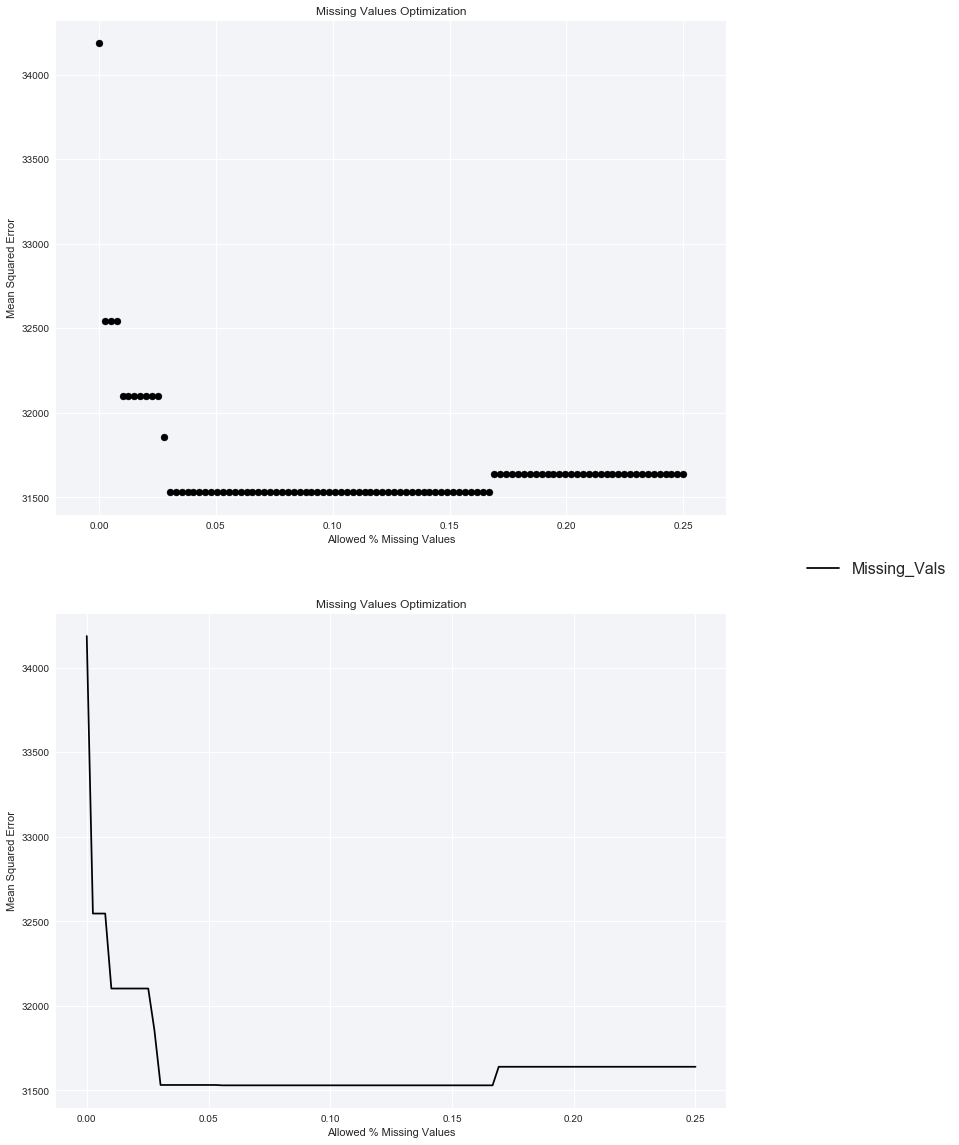

,min_rmse,optimal_h_parameter
Missing_Vals,31530.028432,0.055556


In [30]:
rmse_dict = {'Missing_Vals': rmses}

plot_RMSE_h_para_optimization(missing_values_allowed_percentage, rmse_dict, title="Missing Values Optimization", 
    legend_h_offset = 1.35, legend_v_offset=1.09, x_axis_label='Allowed % Missing Values')

### Minimum Correlation Threshold Optimization
The previously determined optimal values will be used:
* Missing Values Threshold = 0.055556

The *defaults* will be used for all other parameters:
* min_variance = 0.0015
* max_unique_vals = 10
* k-Folds = 2

In [31]:
starting_df = transform_features(data, missing_values_percent_threshold=0.055556)

In [32]:
rmses = []
correlations = np.linspace(0.20,0.7,100)
for cor in correlations:
    features, target, df = select_features(starting_df, min_correlation=cor, min_variance=0.0015, max_unique_vals=10)
    rmses.append(linear_reg_train_test_kfold_validation(df, features, target, 2))

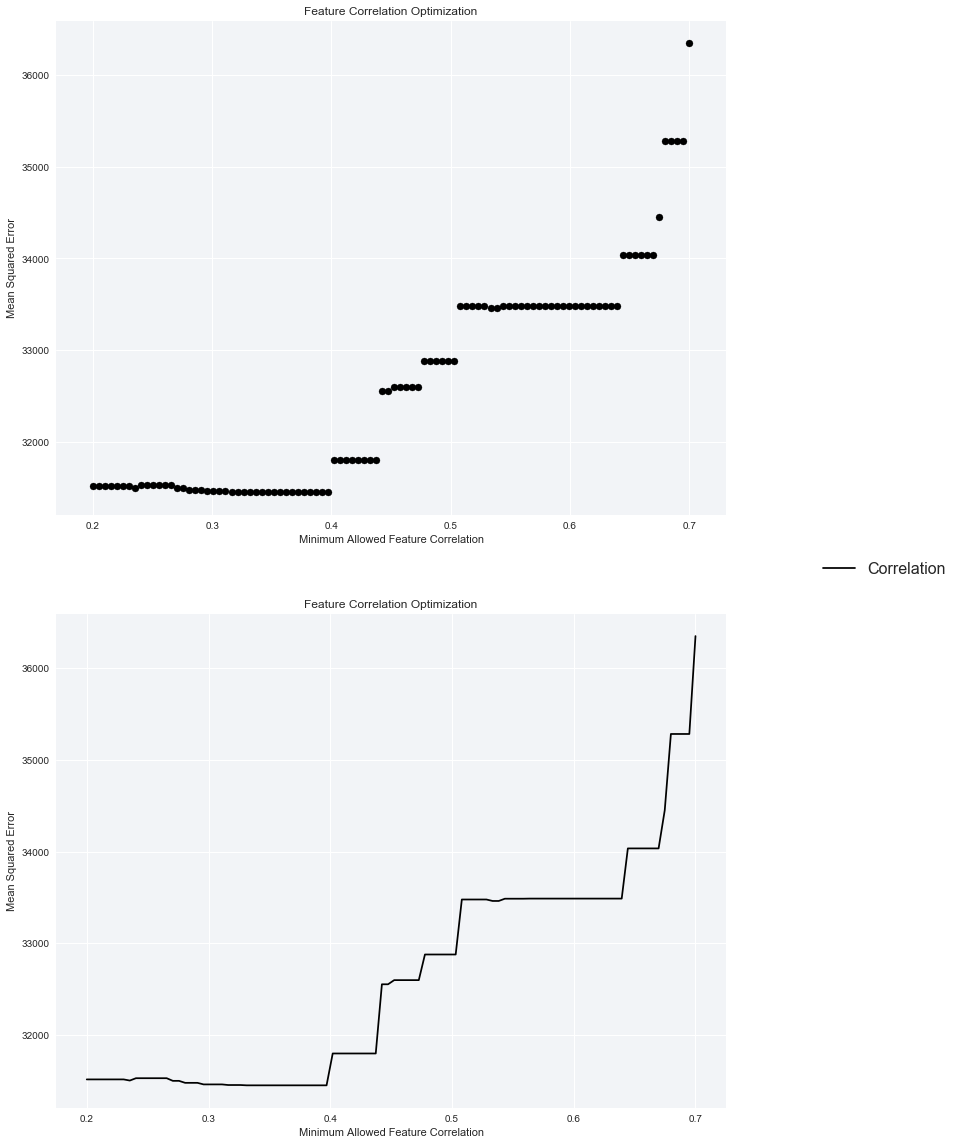

,min_rmse,optimal_h_parameter
Correlation,31452.365134,0.331313


In [33]:
rmse_dict = {'Correlation': rmses}

plot_RMSE_h_para_optimization(correlations, rmse_dict, title="Feature Correlation Optimization", 
    legend_h_offset = 1.35, legend_v_offset=1.09, x_axis_label='Minimum Allowed Feature Correlation')

### Minimum Variance Threshold Optimization
The previously determined optimal values will be used:
* Missing Values Threshold = 0.055556
* Minimum Feature Correlation = 0.331313

The *defaults* will be used for all other parameters:
* max_unique_vals = 10
* k-Folds = 2

In [34]:
rmses = []
varinaces = np.linspace(0.0005,0.1,100)
for var in varinaces:
    features, target, df = select_features(starting_df, min_correlation=0.331313, min_variance=var, max_unique_vals=10)
    rmses.append(linear_reg_train_test_kfold_validation(df, features, target, 2))

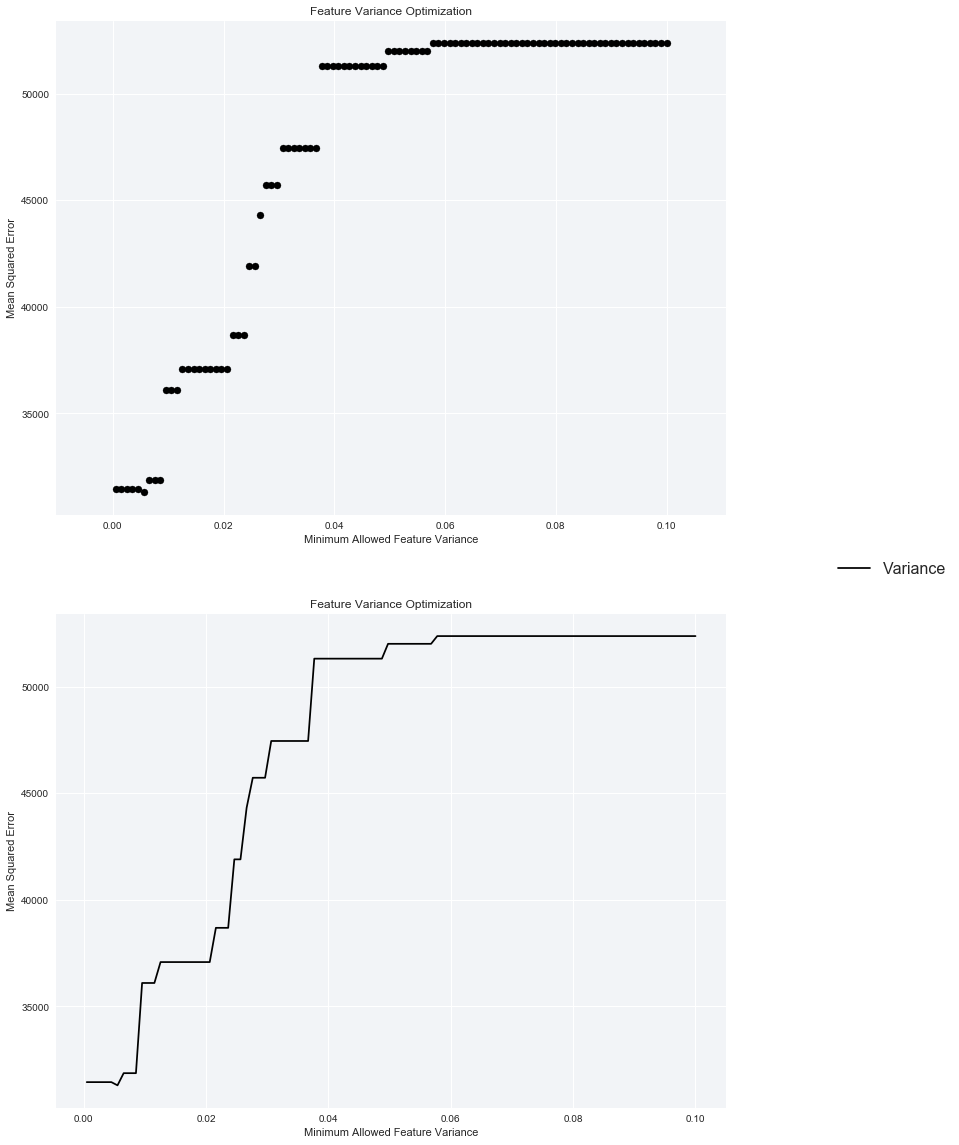

,min_rmse,optimal_h_parameter
Variance,31301.716635,0.005525


In [35]:
rmse_dict = {'Variance': rmses}

plot_RMSE_h_para_optimization(varinaces, rmse_dict, title="Feature Variance Optimization", 
    legend_h_offset = 1.35, legend_v_offset=1.09, x_axis_label='Minimum Allowed Feature Variance')

### Maximum Unique Values Threshold Optimization
The previously determined optimal values will be used:
* Missing Values Threshold = 0.055556
* Minimum Feature Correlation = 0.331313
* Minimum Feature Variance = 0.005525

The *defaults* will be used for all other parameters:
* k-Folds = 2

In [36]:
rmses = []
unique_vals = [v for v in range(5,20)]
for v in unique_vals:
    features, target, df = select_features(starting_df, min_correlation=0.331313, min_variance=0.005525, max_unique_vals=v)
    rmses.append(linear_reg_train_test_kfold_validation(df, features, target, 2))

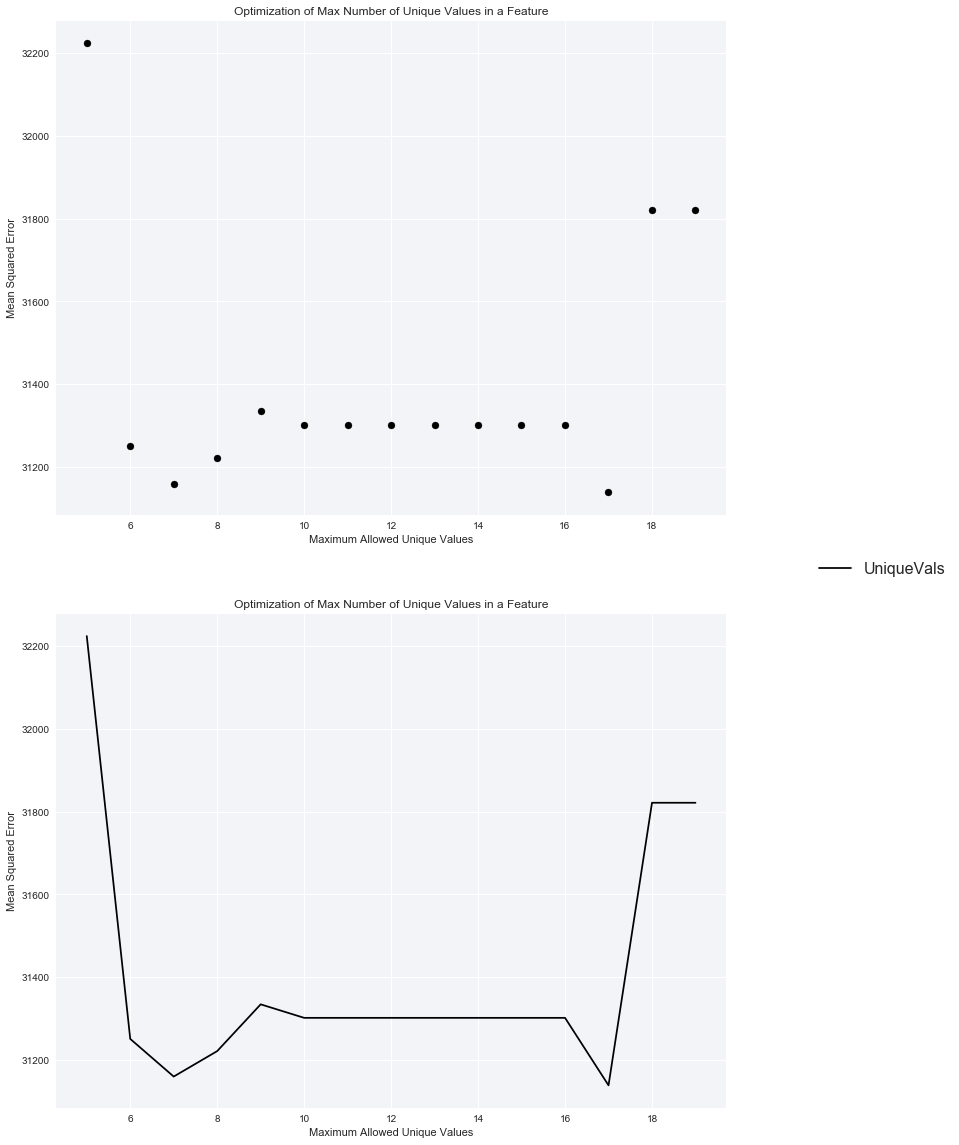

,min_rmse,optimal_h_parameter
UniqueVals,31138.658728,17


In [38]:
rmse_dict = {'UniqueVals': rmses}

plot_RMSE_h_para_optimization(unique_vals, rmse_dict, title="Optimization of Max Number of Unique Values in a Feature", 
    legend_h_offset = 1.35, legend_v_offset=1.09, x_axis_label='Maximum Allowed Unique Values')

### Number of k-Folds Optimization
The previously determined optimal values will be used:
* Missing Values Threshold = 0.055556
* Minimum Feature Correlation = 0.331313
* Minimum Feature Variance = 0.005525
* Maximum Unique Values = 17

In [39]:
features, target, df = select_features(starting_df, min_correlation=0.331313, min_variance=0.005525, max_unique_vals=17)

In [40]:
rmses = []
folds = [f for f in range(2,20)]
for f in folds:
    rmses.append(linear_reg_train_test_kfold_validation(df, features, target, f))

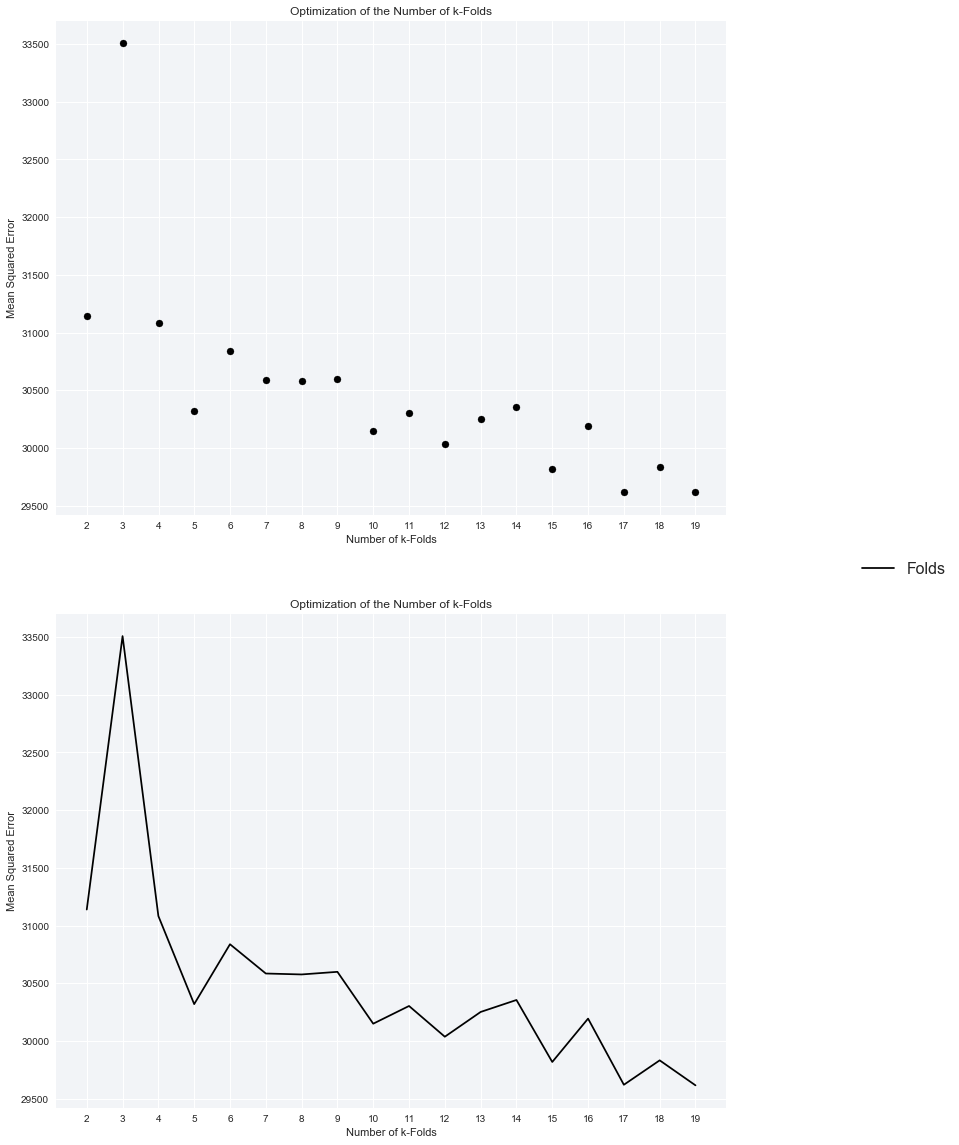

,min_rmse,optimal_h_parameter
Folds,29615.189999,19


In [43]:
rmse_dict = {'Folds': rmses}

plot_RMSE_h_para_optimization(folds, rmse_dict, title="Optimization of the Number of k-Folds", 
    legend_h_offset = 1.35, legend_v_offset=1.09, x_axis_label='Number of k-Folds', default_x_ticks=False)